In [ ]:
# REMOVE HOUSEHOLDS SERVED
# DO I WANT TO REMOVE THE OUTLIERS OR NOT???

"doesn't seem to affect label 0 that badly but it crazy impacts label 2"

## Comparing predictive models of the population and the clusters

Next step is to see if:

1. we can get better predictions within the clusters than within the population as a whole 
2. the trends within the clusters are significantly different (e.g. feature1 is has a positive correlation with recycling rate in cluster0 but a negative correlation in cluster2)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

## Recap

In [2]:
bl_model_coefs = pd.read_csv('data/baseline_models_coefs.csv', index_col=0)
bl_model_scores = pd.read_csv('data/baseline_models_scores.csv', index_col=0)

#### Review Baseline model scores

As confirmed by cross validation in part 3b, the best fit models for the baseline data were all tree-based so I will only consider tree-based models for my individual clusters. Of the baseline models, the best fit was with an **bagging algorithm optimized by gridsearch parameters** (`bagging_op`). The score was 0.139. The follow up score was for an optimized random forest regressor (`rfr_op`, 0.110), and I couldn't get the boosting algorithm to work well with my dataset (I think this algorithm requires more data than most). I expect that bagging or random forest will still work best in the clusters, but I think the fits will be much better (at least in the larger clusters). It will also be interesting to see how the feature importances change.

In [3]:
bl_model_scores

,score_train,score_test,rmse,mae
GS_bagging,0.558013,0.151202,0.073488,0.055929
GS_RF_MSE,0.565859,0.148285,0.073614,0.056166
GS_RF_MAE,0.570668,0.145455,0.073736,0.055663
bagging_op,0.576620,0.139168,0.074007,0.055768
GS_RF_MSE2,0.387818,0.132343,0.074299,0.056118
rfr_op,0.575200,0.128513,0.074463,0.056970
RFR,0.880999,0.090887,0.076054,0.058374
GS_boosting,0.495300,0.085775,0.076267,0.059735
dummy,0.000000,-0.010230,0.080172,0.060118
bagging,0.809259,-0.028548,0.080895,0.062488


#### Review baseline model coefficients (feature importance)

The models mostly agreed on what the important fetures are. However, there are not many important features. Looking at features that scored over 0.05 on the bagging_op models, seems like population is indirectly important in `Households Served by Municipal Recycling Program` and the rest of the important features are related to funding: `Tip Fee as of 1/1/2020`, `PAYT/ SMART`, `What is the transfer station access fee?`, `What is the annual fee?`.

However, these features are not that strongly important. So I'm curious to see how they change in the individual clusters.

In [4]:
bl_model_coefs

,RFR,RFR_op,bagging,bagging_op,gradboost,gradboost_op
Tip Fee as of 1/1/2020,0.194,0.201,0.207,0.248,0.194,0.172
Households Served by Municipal Recycling Program,0.162,0.148,0.159,0.201,0.162,0.192
PAYT/ SMART,0.188,0.198,0.213,0.196,0.188,0.212
What is the transfer station access fee?,0.051,0.051,0.038,0.069,0.051,0.105
What is the annual fee?,0.051,0.040,0.055,0.060,0.051,0.021
Recycling Collection Frequency_Weekly,0.014,0.016,0.005,0.027,0.014,0.025
Does trash disposal tonnage include bulky waste?,0.016,0.020,0.017,0.027,0.016,0.019
# Hours Enforcement Personnel on Street,0.013,0.011,0.013,0.027,0.013,0.016
Municipal Buildings Trash and Recycling Service_Both,0.022,0.015,0.028,0.026,0.022,0.037
Applies to Residential Generators not Eligible to be Served by the Municipal Program,0.015,0.016,0.009,0.025,0.015,0.010


## Setting up data for individual cluster analysis

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, BaggingRegressor, VotingRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsRegressor

In [6]:
# import clustering data

cluster = pd.read_csv('data/cluster_Data.csv', index_col='municipality')
cluster_labels = cluster.loc[:,'km_label':]

In [7]:
# df of service details per municipality with 'hc-schema' labels

df_of_serve_details = pd.read_csv('data/data_for_regression.csv', index_col = 'Municipality Name')
df_of_serve_details = df_of_serve_details.merge(cluster_labels['hc_label'], left_index = True, right_index=True)
df_of_serve_details.head()

,Solid Waste program funded by property tax?,Solid Waste program funded by transfer station access fee?,What is the annual fee?,What is the transfer station access fee?,What is the per-visit fee?,PAYT/ SMART,Municipal Buildings Trash and Recycling Service_Both,Municipal Buildings Trash and Recycling Service_Recycling,Municipal Buildings Trash and Recycling Service_Trash,School Trash and Recycling Service_Both,...,Recycling Enforced by Muni,Recycling Enforced by Hauler,Dedicated Mandatory Recycling Enforcement Personnel,# Hours Enforcement Personnel on Street,Private Hauler regulations that require recycling,%recycle/hh,Recycling Collection Frequency_Bi-weekly,Recycling Collection Frequency_Weekly,Recycle Bin Size Ranking,hc_label
Abington,1,0,0.0,0.0,0.0,0,1,0,0,1,...,1,1,1,20.0,1,0.269733,0,1,0.50,0
Acton,0,1,0.0,100.0,30.0,1,1,0,0,0,...,1,0,0,0.0,0,0.310437,0,0,0.00,2
Acushnet,1,0,0.0,0.0,0.0,0,1,0,0,1,...,1,1,0,0.0,1,0.215648,1,0,1.00,0
Adams,1,1,0.0,50.0,0.0,1,1,0,0,0,...,1,1,0,0.0,1,0.509377,0,0,0.00,0
Agawam,1,0,0.0,0.0,0.0,0,1,0,0,1,...,0,0,0,0.0,0,0.249912,1,0,0.75,0


### Removing the outliers

In [8]:
outliers = df_of_serve_details[df_of_serve_details['%recycle/hh'] > 0.5]
df_of_serve_details = df_of_serve_details[df_of_serve_details['%recycle/hh'] < 0.5]

In [9]:
df_of_serve_details = df_of_serve_details.drop(columns=['Households Served by Municipal Recycling Program'])

### Separating cluster data

It's important to note the quantities of municipalities in each cluster label. Label 0 has the most by far, so shouldn't have too much trouble in terms of training the data and still having enough data to test. Labels 2 and 1 will become a little more challenging as they have under 100 municipalites (label 1 in particular will be tough with only 35 labels). Label 3 is Boston, all by itself, so there is no regression to be had. Boston is very much on a scale far different than any other municipality in terms of population, economic stability, etc, so this makes sense. 

So I will only be studying the fit of three labels, and I'll be expecting some challenging fits within two of them.

In [10]:
df_of_serve_details['hc_label'].value_counts()

0    176
2     51
1     35
3      1
Name: hc_label, dtype: int64

In [11]:
l0_serve = df_of_serve_details.groupby('hc_label').get_group(0)
l1_serve = df_of_serve_details.groupby('hc_label').get_group(1)
l2_serve = df_of_serve_details.groupby('hc_label').get_group(2)
l3_serve = df_of_serve_details.groupby('hc_label').get_group(3)

### Running the regressions

Below is a function for doing some basic-models (with no optimization) on each of the labels. The function fits and scores a dummy model, a random forest regressor, a bagging regressor, and a gradient boosting regressor. `fit_results` will record all the data for comparison after the fits.

In [12]:
fit_results = {}

def tree_models(serv_df, name):
    X = serv_df.drop(columns=['%recycle/hh', 'hc_label'])
    y = serv_df['%recycle/hh']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 8)
    
    dummy = DummyRegressor()
    rfr = RandomForestRegressor(random_state=8)
    bagging = BaggingRegressor(random_state=8)
    boost = GradientBoostingRegressor(min_samples_leaf=5, random_state=8)
    
    model = dummy
    model.fit(X_train,y_train)
    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)
    rmse = mean_squared_error(y_test, model.predict(X_test), squared=False)
    mae = mean_absolute_error(y_test, model.predict(X_test))
    fit_results[name+'__dummy'] = (score_train, score_test, rmse, mae)
    print('dummy complete...')
    
    model = rfr
    model.fit(X_train,y_train)
    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)
    rmse = mean_squared_error(y_test, model.predict(X_test), squared=False)
    mae = mean_absolute_error(y_test, model.predict(X_test))
    fit_results[name+'__rfr'] = (score_train, score_test, rmse, mae)
    print('rfr complete...')
    
    model = bagging
    model.fit(X_train,y_train)
    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)
    rmse = mean_squared_error(y_test, model.predict(X_test), squared=False)
    mae = mean_absolute_error(y_test, model.predict(X_test))
    fit_results[name+'__bagging'] = (score_train, score_test, rmse, mae)
    print('bagging complete...')
    
    model = boost
    model.fit(X_train,y_train)
    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)
    rmse = mean_squared_error(y_test, model.predict(X_test), squared=False)
    mae = mean_absolute_error(y_test, model.predict(X_test))
    fit_results[name+'__boost'] = (score_train, score_test, rmse, mae)
    print('boost complete...')

    return 

In [13]:
tree_models(l0_serve,'L0')

dummy complete...
rfr complete...
bagging complete...
boost complete...


In [14]:
tree_models(l1_serve, 'L1')

dummy complete...
rfr complete...
bagging complete...
boost complete...


In [15]:
tree_models(l2_serve, 'L2')

dummy complete...
rfr complete...
bagging complete...
boost complete...


In [16]:
pd.DataFrame(fit_results, index=['score_train', 'score_test', 'rmse', 'mae']).T.sort_values(by='score_test', ascending = False)

,score_train,score_test,rmse,mae
L2__bagging,0.796488,0.265301,0.073297,0.050249
L2__rfr,0.892452,0.261288,0.073497,0.053212
L2__boost,0.981226,0.224514,0.075304,0.058557
L0__bagging,0.795887,0.141923,0.077404,0.060672
L0__rfr,0.838584,0.132265,0.077839,0.059916
L0__boost,0.814130,0.050854,0.081408,0.062411
L0__dummy,0.000000,-0.017770,0.084300,0.067636
L2__dummy,0.000000,-0.022426,0.086467,0.065253
L1__dummy,0.000000,-0.114973,0.060690,0.052558
L1__boost,0.977855,-0.155822,0.061792,0.052133


#### Initial take-aways

So right away, we can see a few trends:
1. Label 2 suprisingly has the best fits, followed by label 0. As expect, label 1 has the worst fits (even worse then the dummy models), probably because it's sample size is *so* low.
1. the fits in label 2 are *way* higher than those in the baseline model of the entire population. L0 is higher but not to the same degree.
1. the boosting algorithm really seems to lead to overfiting in the training set (with scores consistently above 0.90); I think this is the result of it not using bootstrapping. I realling think that gradient boosting is not the right algorithm for my dataset.

### Tweaking the Regressions

Like I did with the baseline model, I will spend some time tweaking these un-altered models to get the best fit for each cluster. Because I'm looking at 3 different groups, I'm going to drop the Gradient Boosting model as it as repeatedly looked like a bad fit. I will use GridSearch to play with different hyperparameters in random forest regressors and bagging regressors.

In [17]:
params_rf = {
    'n_estimators': [10,100,1000],
    'max_samples': [1, 0.66, 0.33],
    'max_features': [1.0, 0.75, 0.5],
    'max_depth': [5, 10, 20, 50]
}

In [28]:
params_bagging = {
    'n_estimators': [10,100,1000],
    'max_samples': [1.0, 0.66, 0.33],
    'max_features': [1.0, 0.75, 0.5]
}

In [19]:
params_boosting = {
     'n_estimators': [100, 1000],
     'subsample': [1.0, 0.66, 0.33],
     'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1, 0.2]
}

In [20]:
kf = KFold(n_splits=3, shuffle = True, random_state= 8)

In [29]:
def gs_models(serv_df, name):
    X = serv_df.drop(columns=['%recycle/hh', 'hc_label'])
    y = serv_df['%recycle/hh']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 8)

    rfr = RandomForestRegressor(random_state=8)
    bagging = BaggingRegressor(random_state=8)
    boost = GradientBoostingRegressor(min_samples_leaf=5, random_state=8)

    gs1 = GridSearchCV(rfr, params_rf, cv=kf, n_jobs=-1)
    gs1.fit(X_train,y_train)
    score_train = gs1.score(X_train, y_train)
    score_test = gs1.score(X_test, y_test)
    rmse = mean_squared_error(y_test, gs1.predict(X_test), squared=False)
    mae = mean_absolute_error(y_test, gs1.predict(X_test))
    fit_results[name+'__gs_rfr'] = (score_train, score_test, rmse, mae)
    print('gridsearch rfr complete...')
    
    gs2 = GridSearchCV(bagging, params_bagging, cv=kf, n_jobs=-1)
    gs2.fit(X_train,y_train)
    score_train = gs2.score(X_train, y_train)
    score_test = gs2.score(X_test, y_test)
    rmse = mean_squared_error(y_test, gs2.predict(X_test), squared=False)
    mae = mean_absolute_error(y_test, gs2.predict(X_test))
    fit_results[name+'__gs_bagging'] = (score_train, score_test, rmse, mae)
    print('gridsearch bagging complete...')
    
    gs3 = GridSearchCV(boost, params_boosting, cv=kf, n_jobs=-1)
    gs3.fit(X_train,y_train)
    score_train = gs3.score(X_train, y_train)
    score_test = gs3.score(X_test, y_test)
    rmse = mean_squared_error(y_test, gs3.predict(X_test), squared=False)
    mae = mean_absolute_error(y_test, gs3.predict(X_test))
    fit_results[name+'__gs_boosting'] = (score_train, score_test, rmse, mae)
    print('gridsearch boosting complete...')

    return (gs1, gs2, gs3)

### Label 0

In [30]:
L0_gs1, L0_gs2, L0_gs3 = gs_models(l0_serve,'L0')

gridsearch rfr complete...
gridsearch bagging complete...
gridsearch boosting complete...


In [31]:
gs_cv_results = pd.DataFrame(L0_gs1.cv_results_).sort_values(by='mean_test_score', ascending = False)
gs_cv_results.iloc[:,4:].head(20)
# gs_cv_results[gs_cv_results['mean_test_score'] > 0].iloc[:,4:]

,param_max_depth,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
37,10,0.75,1,100,"{'max_depth': 10, 'max_features': 0.75, 'max_s...",-0.043853,-0.000249,-0.004131,-0.016077,0.019704,1
10,5,0.75,1,100,"{'max_depth': 5, 'max_features': 0.75, 'max_sa...",-0.043853,-0.000249,-0.004131,-0.016077,0.019704,1
55,20,1,1,100,"{'max_depth': 20, 'max_features': 1.0, 'max_sa...",-0.043853,-0.000249,-0.004131,-0.016077,0.019704,1
46,10,0.5,1,100,"{'max_depth': 10, 'max_features': 0.5, 'max_sa...",-0.043853,-0.000249,-0.004131,-0.016077,0.019704,1
19,5,0.5,1,100,"{'max_depth': 5, 'max_features': 0.5, 'max_sam...",-0.043853,-0.000249,-0.004131,-0.016077,0.019704,1
64,20,0.75,1,100,"{'max_depth': 20, 'max_features': 0.75, 'max_s...",-0.043853,-0.000249,-0.004131,-0.016077,0.019704,1
73,20,0.5,1,100,"{'max_depth': 20, 'max_features': 0.5, 'max_sa...",-0.043853,-0.000249,-0.004131,-0.016077,0.019704,1
28,10,1,1,100,"{'max_depth': 10, 'max_features': 1.0, 'max_sa...",-0.043853,-0.000249,-0.004131,-0.016077,0.019704,1
82,50,1,1,100,"{'max_depth': 50, 'max_features': 1.0, 'max_sa...",-0.043853,-0.000249,-0.004131,-0.016077,0.019704,1
91,50,0.75,1,100,"{'max_depth': 50, 'max_features': 0.75, 'max_s...",-0.043853,-0.000249,-0.004131,-0.016077,0.019704,1


For random forest, all the scores are negative and very much the same. Looks like the only thing that mattered was n_estimators, the best being 100 (which is the default).

In [32]:
gs_cv_results = pd.DataFrame(L0_gs2.cv_results_).sort_values(by='mean_test_score', ascending = False)
gs_cv_results.iloc[:,4:].head(5)
# gs_cv_results[gs_cv_results['mean_test_score'] > 0].iloc[:,4:]

,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
26,0.5,0.33,1000,"{'max_features': 0.5, 'max_samples': 0.33, 'n_...",-0.092307,-0.026762,-0.028379,-0.049149,0.030524,1
25,0.5,0.33,100,"{'max_features': 0.5, 'max_samples': 0.33, 'n_...",-0.161672,-0.013784,-0.034904,-0.070120,0.065309,2
17,0.75,0.33,1000,"{'max_features': 0.75, 'max_samples': 0.33, 'n...",-0.130407,-0.039188,-0.043129,-0.070908,0.042103,3
16,0.75,0.33,100,"{'max_features': 0.75, 'max_samples': 0.33, 'n...",-0.172649,-0.003727,-0.045392,-0.073923,0.071853,4
8,1,0.33,1000,"{'max_features': 1.0, 'max_samples': 0.33, 'n_...",-0.192803,-0.051215,-0.018938,-0.087652,0.075512,5


For bagging, all the scores were negative but different. Looks like max_samples of 0.33 consistently performed the best, and n_estimators of 1000 generally did better along with a max_feature of 0.5.

In [33]:
gs_cv_results = pd.DataFrame(L0_gs3.cv_results_).sort_values(by='mean_test_score', ascending = False)
gs_cv_results.iloc[:,4:].head(5)
# gs_cv_results[gs_cv_results['mean_test_score'] > 0].iloc[:,4:]

,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
8,0.05,5,100,0.33,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",-0.105853,-0.084197,-0.061665,-0.083905,0.018041,1
2,0.05,3,100,0.33,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",-0.108292,-0.084181,-0.071498,-0.087990,0.015261,2
14,0.1,3,100,0.33,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",-0.198500,-0.189851,-0.142893,-0.177081,0.024431,3
20,0.1,5,100,0.33,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",-0.200818,-0.188578,-0.141906,-0.177101,0.025383,4
1,0.05,3,100,0.66,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",-0.394138,-0.209521,-0.189969,-0.264543,0.091984,5


All negative scores for boosting as well. n_estimators of 100 (default) and a subsample rate of 0.33 was consistently best and a learning rate of 0.5 usually did very well. max_depth performed similarly between 5 and 3.

In [40]:
serv_df = l0_serve
name = 'L0'

X = serv_df.drop(columns=['%recycle/hh', 'hc_label'])
y = serv_df['%recycle/hh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 8)

rfr = RandomForestRegressor(random_state=8)
bagging = BaggingRegressor(random_state=8)
boost = GradientBoostingRegressor(learning_rate=0.05, subsample= 0.33, min_samples_leaf=5, random_state=8)

rfr.fit(X_train,y_train)
score_train = rfr.score(X_train, y_train)
score_test = rfr.score(X_test, y_test)
rmse = mean_squared_error(y_test, rfr.predict(X_test), squared=False)
mae = mean_absolute_error(y_test, rfr.predict(X_test))
fit_results[name+'__rfr_op'] = (score_train, score_test, rmse, mae)
print('rfr complete...')

bagging.fit(X_train,y_train)
score_train = bagging.score(X_train, y_train)
score_test = bagging.score(X_test, y_test)
rmse = mean_squared_error(y_test, bagging.predict(X_test), squared=False)
mae = mean_absolute_error(y_test, bagging.predict(X_test))
fit_results[name+'__bagging_op'] = (score_train, score_test, rmse, mae)
print('bagging complete...')

boost.fit(X_train,y_train)
score_train = boost.score(X_train, y_train)
score_test = boost.score(X_test, y_test)
rmse = mean_squared_error(y_test, boost.predict(X_test), squared=False)
mae = mean_absolute_error(y_test, boost.predict(X_test))
fit_results[name+'__boosting_op'] = (score_train, score_test, rmse, mae)
print('boosting complete...')
    

rfr complete...
bagging complete...
boosting complete...


In [41]:
L0_results = pd.DataFrame(fit_results, index=['score_train', 'score_test', 'rmse', 'mae']).T.sort_index().iloc[:10]
L0_results.sort_values(by='score_test', ascending = False)

,score_train,score_test,rmse,mae
L0__bagging,0.795887,0.141923,0.077404,0.060672
L0__bagging_op,0.795887,0.141923,0.077404,0.060672
L0__rfr,0.838584,0.132265,0.077839,0.059916
L0__rfr_op,0.838584,0.132265,0.077839,0.059916
L0__gs_bagging,0.466454,0.098981,0.079317,0.062529
L0__gs_boosting,0.536404,0.079953,0.080151,0.061491
L0__boosting_op,0.495201,0.058816,0.081066,0.061765
L0__boost,0.814130,0.050854,0.081408,0.062411
L0__gs_rfr,-0.003681,-0.006922,0.083849,0.067281
L0__dummy,0.000000,-0.017770,0.084300,0.067636


#### Residuals

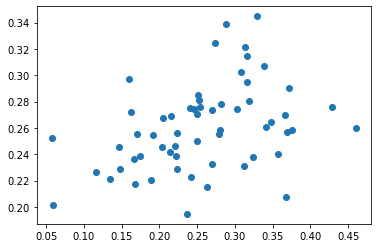

In [42]:
plt.scatter(y_test, bagging.predict(X_test));

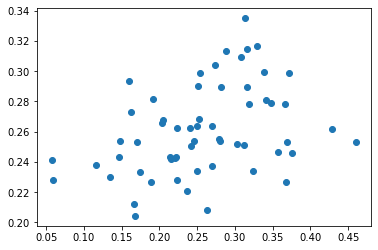

In [37]:
plt.scatter(y_test, rfr.predict(X_test));

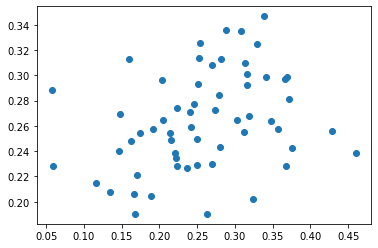

In [39]:
plt.scatter(y_test, boost.predict(X_test));

#### Coefficients for feature importance

In [43]:
bagging_trees_coefs = {}
for tree in range(len(bagging.estimators_)):
    bagging_trees_coefs[tree] = dict(zip(bagging.estimators_features_[tree], bagging.estimators_[tree].feature_importances_))

bagging_trees_coefs = pd.DataFrame(bagging_trees_coefs).sort_index()
L0__bagging_coefs = pd.DataFrame(bagging_trees_coefs.mean(axis=1))
L0__bagging_coefs['Feature Name'] = X.columns
L0__bagging_coefs.set_index('Feature Name', inplace = True)
L0__bagging_coefs.rename(columns={0:'coefs'}, inplace = True)
L0__bagging_coefs.sort_values(by='coefs', ascending=False).head(10)

,coefs
Feature Name,
Tip Fee as of 1/1/2020,0.214443
PAYT/ SMART,0.105201
What is the transfer station access fee?,0.098964
What is the annual fee?,0.059289
Business Trash and Recycling Service_Recycling,0.047045
Private Hauler regulations that require recycling,0.040191
SS Recycling,0.034084
Applies to Commercial Generators,0.026658
Applies to Residential Generators not Eligible to be Served by the Municipal Program,0.026651


#### Thoughts on Label 0

So, default Bagging actually performed the best with an test score R2 value of 0.203 and an MAE of 0.054. Seems like any alterations to the bagging algorithm just resulted in worse fits both in training and testing, which I find interesting. For random forest, I was able to bring up the test score from 0.113 to 0.146 but this still doesn't beat the plain bagging algorithm. 

Overall, this score still beats the overall population's fit but my hypothesis is that this rather large cluster of 150+ municipalities may actually be better represented in two groups. Perhaps going back to a clustering algorithm where n=5 may be interesting to look at in contrast.

This hypothesis is further supported by the top feature importances of this bagging model which mostly mirror the total-population: indirectly population with `Households Served by Municipal Recycling Program` and funding information in `Tip Fee as of 1/1/2020`, `What is the transfer station access fee?`, `PAYT/ SMART`, and `What is the annual fee?`.

### Label 1

In [45]:
L1_gs1, L1_gs2, L1_gs3 = gs_models(l1_serve,'L1')

gridsearch rfr complete...
gridsearch bagging complete...
gridsearch boosting complete...


In [50]:
gs_cv_results = pd.DataFrame(L1_gs1.cv_results_).sort_values(by='mean_test_score', ascending = False)
gs_cv_results.iloc[:,4:].head(20)
# gs_cv_results[gs_cv_results['mean_test_score'] > 0].iloc[:,4:]

,param_max_depth,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
37,10,0.75,1,100,"{'max_depth': 10, 'max_features': 0.75, 'max_s...",-0.293379,-0.168197,-0.052727,-0.171434,0.098272,1
10,5,0.75,1,100,"{'max_depth': 5, 'max_features': 0.75, 'max_sa...",-0.293379,-0.168197,-0.052727,-0.171434,0.098272,1
100,50,0.5,1,100,"{'max_depth': 50, 'max_features': 0.5, 'max_sa...",-0.293379,-0.168197,-0.052727,-0.171434,0.098272,1
1,5,1,1,100,"{'max_depth': 5, 'max_features': 1.0, 'max_sam...",-0.293379,-0.168197,-0.052727,-0.171434,0.098272,1
55,20,1,1,100,"{'max_depth': 20, 'max_features': 1.0, 'max_sa...",-0.293379,-0.168197,-0.052727,-0.171434,0.098272,1
19,5,0.5,1,100,"{'max_depth': 5, 'max_features': 0.5, 'max_sam...",-0.293379,-0.168197,-0.052727,-0.171434,0.098272,1
46,10,0.5,1,100,"{'max_depth': 10, 'max_features': 0.5, 'max_sa...",-0.293379,-0.168197,-0.052727,-0.171434,0.098272,1
64,20,0.75,1,100,"{'max_depth': 20, 'max_features': 0.75, 'max_s...",-0.293379,-0.168197,-0.052727,-0.171434,0.098272,1
73,20,0.5,1,100,"{'max_depth': 20, 'max_features': 0.5, 'max_sa...",-0.293379,-0.168197,-0.052727,-0.171434,0.098272,1
28,10,1,1,100,"{'max_depth': 10, 'max_features': 1.0, 'max_sa...",-0.293379,-0.168197,-0.052727,-0.171434,0.098272,1


All the scores are negative for a max_sample of 0.33 consistently did best along with n_estimators of 10. Limiting max features didn't help, and max_depth didn't seem do do anything, so I'll remove those two attributes.

In [47]:
gs_cv_results = pd.DataFrame(L1_gs2.cv_results_).sort_values(by='mean_test_score', ascending = False)
gs_cv_results.iloc[:,4:].head(5)
# gs_cv_results[gs_cv_results['mean_test_score'] > 0].iloc[:,4:]

,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,1,0.66,10,"{'max_features': 1.0, 'max_samples': 0.66, 'n_...",-0.657756,0.301141,0.258055,-0.032853,0.442223,1
7,1,0.33,100,"{'max_features': 1.0, 'max_samples': 0.33, 'n_...",-0.428985,-0.121003,-0.128341,-0.226110,0.143486,2
6,1,0.33,10,"{'max_features': 1.0, 'max_samples': 0.33, 'n_...",-0.832832,0.095527,0.013467,-0.241279,0.419630,3
8,1,0.33,1000,"{'max_features': 1.0, 'max_samples': 0.33, 'n_...",-0.571192,-0.137657,-0.084723,-0.264524,0.217921,4
26,0.5,0.33,1000,"{'max_features': 0.5, 'max_samples': 0.33, 'n_...",-0.597017,-0.220024,-0.039421,-0.285487,0.232296,5


All negative scores again. the only difference from default in the best fit is a max_sample of 0.66. There's a pretty sharp drop off in score after that.

In [48]:
gs_cv_results = pd.DataFrame(L1_gs3.cv_results_).sort_values(by='mean_test_score', ascending = False)
gs_cv_results.iloc[:,4:].head(5)
# gs_cv_results[gs_cv_results['mean_test_score'] > 0].iloc[:,4:]

,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
35,0.2,5,1000,0.33,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",-0.053451,-0.281492,-0.018915,-0.117953,0.116496,1
29,0.2,3,1000,0.33,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",-0.053451,-0.281492,-0.018915,-0.117953,0.116496,1
17,0.1,3,1000,0.33,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",-0.237776,-0.263706,-0.002957,-0.168146,0.117285,3
23,0.1,5,1000,0.33,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",-0.237776,-0.263706,-0.002957,-0.168146,0.117285,3
11,0.05,5,1000,0.33,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",-0.414038,-0.233598,-0.001710,-0.216449,0.168768,5


for boosting, a faster learning rate was better along with higher n_estimators. A subsampling rate of 0.33 was consistently best. Max depth didn't seem to matter much.

In [74]:
serv_df = l1_serve
name = 'L1'

X = serv_df.drop(columns=['%recycle/hh', 'hc_label'])
y = serv_df['%recycle/hh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 8)

rfr = RandomForestRegressor(random_state=8)
bagging = BaggingRegressor(max_samples=0.66, random_state=8)
boost = GradientBoostingRegressor(learning_rate=0.2, n_estimators=1000, subsample= 0.33, min_samples_leaf=5, random_state=8)

rfr.fit(X_train,y_train)
score_train = rfr.score(X_train, y_train)
score_test = rfr.score(X_test, y_test)
rmse = mean_squared_error(y_test, rfr.predict(X_test), squared=False)
mae = mean_absolute_error(y_test, rfr.predict(X_test))
fit_results[name+'__rfr_op'] = (score_train, score_test, rmse, mae)
print('rfr complete...')

bagging.fit(X_train,y_train)
score_train = bagging.score(X_train, y_train)
score_test = bagging.score(X_test, y_test)
rmse = mean_squared_error(y_test, bagging.predict(X_test), squared=False)
mae = mean_absolute_error(y_test, bagging.predict(X_test))
fit_results[name+'__bagging_op'] = (score_train, score_test, rmse, mae)
print('bagging complete...')

boost.fit(X_train,y_train)
score_train = boost.score(X_train, y_train)
score_test = boost.score(X_test, y_test)
rmse = mean_squared_error(y_test, boost.predict(X_test), squared=False)
mae = mean_absolute_error(y_test, boost.predict(X_test))
fit_results[name+'__boosting_op'] = (score_train, score_test, rmse, mae)
print('boosting complete...')
    

rfr complete...
bagging complete...
boosting complete...


In [75]:
L1_results = pd.DataFrame(fit_results, index=['score_train', 'score_test', 'rmse', 'mae']).T.sort_index().iloc[10:20]
L1_results.sort_values(by='score_test', ascending = False)

,score_train,score_test,rmse,mae
L1__bagging_op,0.415117,0.064822,0.055582,0.047063
L1__gs_bagging,0.415117,0.064822,0.055582,0.047063
L1__gs_rfr,-0.007076,-0.057189,0.059097,0.049686
L1__dummy,0.000000,-0.114973,0.060690,0.052558
L1__boost,0.977855,-0.155822,0.061792,0.052133
L1__boosting_op,-0.018152,-0.249140,0.064238,0.057157
L1__gs_boosting,-0.018152,-0.249140,0.064238,0.057157
L1__rfr,0.857224,-0.272986,0.064848,0.054631
L1__rfr_op,0.857224,-0.272986,0.064848,0.054631
L1__bagging,0.819872,-0.561766,0.071828,0.061489


#### Coefficients for feature importance

I'll just be looking at the coefficients from the optimized random forest but I won't put too much stock in the results because these fits were so poor.

In [53]:
bagging_trees_coefs = {}
for tree in range(len(bagging.estimators_)):
    bagging_trees_coefs[tree] = dict(zip(bagging.estimators_features_[tree], bagging.estimators_[tree].feature_importances_))

bagging_trees_coefs = pd.DataFrame(bagging_trees_coefs).sort_index()
L1__bagging_coefs = pd.DataFrame(bagging_trees_coefs.mean(axis=1))
L1__bagging_coefs['Feature Name'] = X.columns
L1__bagging_coefs.set_index('Feature Name', inplace = True)
L1__bagging_coefs.rename(columns={0:'coefs'}, inplace = True)
L1__bagging_coefs.sort_values(by='coefs', ascending=False).head(10)

,coefs
Feature Name,
Tip Fee as of 1/1/2020,0.186216
Applies to Residential Generators not Eligible to be Served by the Municipal Program,0.117537
Annual Bulky Waste Limit,0.110626
Solid Waste program funded by property tax?,0.075979
Recycle Bin Size Ranking,0.068423
Maximum # bags/ barrels per week,0.067858
Recycling Collection Frequency_Weekly,0.067806
School Trash and Recycling Service_Both,0.055905
# Hours Enforcement Personnel on Street,0.051400


#### Thoughts on Label 1

None of the models produce a positive score. I'm not surprised by this because of the size of label 1 (35 municipalities). These are not a lot of data points so perhaps a fit is indeterminable or I'd need to seek other methods for small sample sizes that apply to tree-based models.

I really don't want to even interpret the coefficients because the model fits are so poor. I don't think these coefficients mean much.

### Label 2

In [54]:
L2_gs1, L2_gs2, L2_gs3 = gs_models(l2_serve,'L2')

gridsearch rfr complete...
gridsearch bagging complete...
gridsearch boosting complete...


In [55]:
gs_cv_results = pd.DataFrame(L2_gs1.cv_results_).sort_values(by='mean_test_score', ascending = False)
gs_cv_results.iloc[:,4:].head(5)
# gs_cv_results[gs_cv_results['mean_test_score'] > 0].iloc[:,4:]

,param_max_depth,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
25,5,0.5,0.33,100,"{'max_depth': 5, 'max_features': 0.5, 'max_sam...",-0.182141,0.308158,0.003087,0.043034,0.202147,1
106,50,0.5,0.33,100,"{'max_depth': 50, 'max_features': 0.5, 'max_sa...",-0.183473,0.306178,0.004661,0.042455,0.201678,2
79,20,0.5,0.33,100,"{'max_depth': 20, 'max_features': 0.5, 'max_sa...",-0.183473,0.306178,0.004661,0.042455,0.201678,2
52,10,0.5,0.33,100,"{'max_depth': 10, 'max_features': 0.5, 'max_sa...",-0.183473,0.306178,0.004661,0.042455,0.201678,2
104,50,0.5,0.66,1000,"{'max_depth': 50, 'max_features': 0.5, 'max_sa...",-0.079403,0.142448,0.044173,0.035739,0.090767,5


for random forest, actually had positive test scores.  A default n_estimator was best but max_feature of 0.5 was consistently better, along with max_sample of 0.33. max_depth of 5 seemed best.

In [56]:
gs_cv_results = pd.DataFrame(L2_gs2.cv_results_).sort_values(by='mean_test_score', ascending = False)
gs_cv_results.iloc[:,4:].head(5)
# gs_cv_results[gs_cv_results['mean_test_score'] > 0].iloc[:,4:]

,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
25,0.5,0.33,100,"{'max_features': 0.5, 'max_samples': 0.33, 'n_...",-0.003752,0.217726,0.074825,0.096267,0.091680,1
23,0.5,0.66,1000,"{'max_features': 0.5, 'max_samples': 0.66, 'n_...",-0.060833,0.248132,0.029922,0.072407,0.129662,2
22,0.5,0.66,100,"{'max_features': 0.5, 'max_samples': 0.66, 'n_...",-0.050517,0.253346,-0.006410,0.065473,0.134061,3
21,0.5,0.66,10,"{'max_features': 0.5, 'max_samples': 0.66, 'n_...",-0.159981,0.454214,-0.103437,0.063599,0.277170,4
14,0.75,0.66,1000,"{'max_features': 0.75, 'max_samples': 0.66, 'n...",-0.020700,0.190152,0.013376,0.060943,0.092418,5


for bagging, the scores are all positive again. It's strange because a max_sample of 0.66 worked best for most samples but 0.33 worked best of all. I may tweak this. A max_feature of 0.5 worked fairly consistently best.

In [58]:
gs_cv_results = pd.DataFrame(L2_gs3.cv_results_).sort_values(by='mean_test_score', ascending = False)
gs_cv_results.iloc[:,4:].head(5)
# gs_cv_results[gs_cv_results['mean_test_score'] > 0].iloc[:,4:]

,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,0.05,3,100,0.66,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",0.304103,-0.322139,0.285853,0.089272,0.291007,1
7,0.05,5,100,0.66,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",0.304103,-0.322139,0.285853,0.089272,0.291007,1
19,0.1,5,100,0.66,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.329251,-0.541733,0.305033,0.030850,0.404998,3
13,0.1,3,100,0.66,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.329251,-0.541733,0.305033,0.030850,0.404998,3
0,0.05,3,100,1,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",0.183682,-0.725331,0.059670,-0.160660,0.402480,5


for boosting, a learning_rate of 0.05 generally did best. Default n_parameters did  best, and generally a subsample of 0.66 did best. max_depth didn't do much. 

In [64]:
serv_df = l2_serve
name = 'L2'

X = serv_df.drop(columns=['%recycle/hh', 'hc_label'])
y = serv_df['%recycle/hh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 8)

rfr = RandomForestRegressor(random_state=8)
bagging = BaggingRegressor(random_state=8)
boost = GradientBoostingRegressor(learning_rate=0.05,  subsample= 0.66, min_samples_leaf=5, random_state=8)

rfr.fit(X_train,y_train)
score_train = rfr.score(X_train, y_train)
score_test = rfr.score(X_test, y_test)
rmse = mean_squared_error(y_test, rfr.predict(X_test), squared=False)
mae = mean_absolute_error(y_test, rfr.predict(X_test))
fit_results[name+'__rfr_op'] = (score_train, score_test, rmse, mae)
print('rfr complete...')

bagging.fit(X_train,y_train)
score_train = bagging.score(X_train, y_train)
score_test = bagging.score(X_test, y_test)
rmse = mean_squared_error(y_test, bagging.predict(X_test), squared=False)
mae = mean_absolute_error(y_test, bagging.predict(X_test))
fit_results[name+'__bagging_op'] = (score_train, score_test, rmse, mae)
print('bagging complete...')

boost.fit(X_train,y_train)
score_train = boost.score(X_train, y_train)
score_test = boost.score(X_test, y_test)
rmse = mean_squared_error(y_test, boost.predict(X_test), squared=False)
mae = mean_absolute_error(y_test, boost.predict(X_test))
fit_results[name+'__boosting_op'] = (score_train, score_test, rmse, mae)
print('boosting complete...')
    

rfr complete...
bagging complete...
boosting complete...


In [65]:
L2_results = pd.DataFrame(fit_results, index=['score_train', 'score_test', 'rmse', 'mae']).T.sort_index().iloc[20:]
L2_results.sort_values(by='score_test', ascending = False)

,score_train,score_test,rmse,mae
L2__boosting_op,0.854622,0.288467,0.072132,0.052849
L2__gs_boosting,0.854622,0.288467,0.072132,0.052849
L2__bagging,0.796488,0.265301,0.073297,0.050249
L2__bagging_op,0.796488,0.265301,0.073297,0.050249
L2__rfr,0.892452,0.261288,0.073497,0.053212
L2__rfr_op,0.892452,0.261288,0.073497,0.053212
L2__boost,0.981226,0.224514,0.075304,0.058557
L2__gs_bagging,0.568148,0.075336,0.082229,0.060942
L2__gs_rfr,0.625095,0.066962,0.082600,0.062028
L2__dummy,0.000000,-0.022426,0.086467,0.065253


### Residuals

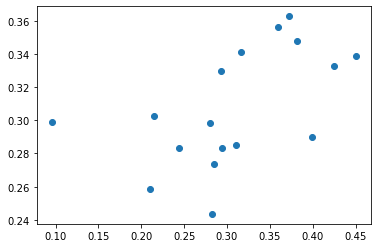

In [66]:
plt.scatter(y_test, rfr.predict(X_test));

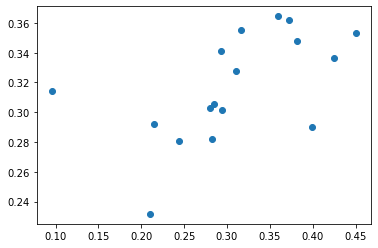

In [67]:
plt.scatter(y_test, bagging.predict(X_test));

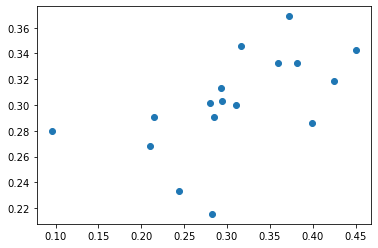

In [69]:
plt.scatter(y_test, boost.predict(X_test));

### Coefficients

In [70]:
L2__gradboost_op_coefs = boost.feature_importances_


In [71]:
L2__gradboost_op_coefs = pd.DataFrame(L2__gradboost_op_coefs, index=X.columns)
# L2__rfr_op_coefs.rename(index={L2__rfr_op_coefs.index:'Feature Name'}, inplace = True)
L2__gradboost_op_coefs.rename(columns={0:'coefs'}, inplace = True)
L2__gradboost_op_coefs.sort_values(by='coefs', ascending=False).head(10)

,coefs
PAYT/ SMART,0.308585
SS Recycling,0.154834
Tip Fee as of 1/1/2020,0.149523
Recycling Collection Frequency_Weekly,0.103486
Trash Service Type_Curbside,0.043993
School Trash and Recycling Service_Both,0.042321
Fee for bulky waste?,0.031816
Recycling Enforced by Hauler,0.031653
Applies to Residential Generators Eligible to be Served by Municipal Program,0.029709
Recycling Service Type_Both,0.021110


#### Thoughts on Label 2

This label definitely has the best fit of the bunch with a test score of 0.533 and MAE of 0.043. I'm actually curious to see what the residuals look like from this model.

Okay, so it looks like it had a hard time accurately predicting lower scoring municipalities, and for some reason there's a huge jump betweeb the second to highest point and the highest point. That is rather curious... but it seems like the model at least predicted the trend, which is what we're interested in for determing important features.

Based on the coefficients, We still see a trend of funding and population being important but we have some more diversity in features: `Maximum # bags/ barrels per week` and `SS Recycling`.

These coefficients may suggest that putting a limit on how much trash you can throw out per week and that having single stream recycle services is the most effective way to increase recycling. Also, in-terms of funding models, a Pay-As-You throw (PAY/SMART) model in addition to annual fees seem to yield better rates of recycling. `Tip Fee as of 1/1/2020` implies #TODO

As for total households served, I'm guessing that smaller municipalities do not have the funds to support added features like enforcement. However, enforcement doesn't seem to be a very important feature, so I'm not sure what to make of recycle rate being tied to population.